<a href="https://colab.research.google.com/github/Ajit-Kumar-Padhy/Ajit-kumar-padhy/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



### **Project Type**    - EDA
### **Contribution**    - Individual

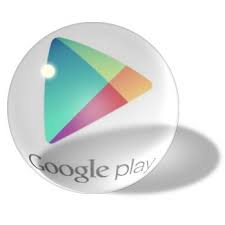

# **Project Summary -**

###The Google Playstore Analysis is presented by Ajit Kumar Padhy.The datasets for the project were provided by Almabetter Team. One of the dataset is of Playstore's Data Analysis and another one is of User Reviews.


###The purpose of selecting this project is to get the insight of applications domain used in Android Mobile Phones/Tablets. Which is a challenging task.


###The project started from idea of analysis of Playstore and uploading of both the datasets. We started with cleaning the datasets and provided them required modifications in order to gain the right data from dataset. After all this, we got the right insights about the objectives that we have used in our project.

###In this project,We have analysed all the objectives and provided them with proper wrangling and visualization through which we have had able to solve our objectives. After that we concluded our project with the results which we have observed through our work.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### Android is expanding as an operating system. It has captured around 74% of the total market which is a true indicator of the huge amount of population using android. Our goal is to help android developers to know what is the motivating factor for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. I would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related.

##Some questions to answer.
###1.What is the top 5 apps on the basis of installs?
###2. What is the top 5 reviewed apps?
###3. What is the top 5 expensive apps?
###4. What is the top 3 most installed apps in Game category?
###5. Which 5 apps from the 'FAMILY' category are having the lowest rating?
###6. How many applications have five star Ratting ?
###7. Which application have most number of reviews?
###8. Which app is the most expensive app ?
###9. Which application is biggest in size ?
###10. Which application is smallest in size ?
###11. Which Android version contain most of the application ?

### **Define Your Business Objective?**

###Well, it is to analyse the data and see where we can customise to gain more traffic on each app. Our main objective is to find the negative reviews,poor ratings, android version & total no. of downloads etc. These all aspects are analysed via category.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# # import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# allow matplotlib to plot inline with frontends like Jupyter

### Dataset Loading

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load play store data
df1 = pd.read_csv('/content/drive/MyDrive/Play Store Data (1).csv')

#Load user rivew data
df2 = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

In [ ]:
df2.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df1.shape)
print(df2.shape)

###From the above code we get to know that our first Data Frame has 10842 rows and 13 columns, and our second Data Frame has 64295 rows and 5 columns.

### Dataset Information

In [ ]:
df1.sample(10)

In [ ]:
# Dataset Info
df1.info()

In [ ]:
df2.sample(10)

In [ ]:
df2.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1[df1.duplicated(keep='first')]

In [ ]:
size_l = [i for i in df1[['Size']]]


In [ ]:
df2[df2.duplicated(keep='first')]

In [ ]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# check on null values
df1.isna().sum()

###Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.



In [ ]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values
    with median values
    """
    return series.fillna(series.median())

df1['Rating'] = df1['Rating'].transform(replace_with_median)
df1['Rating'] = df1['Rating'].astype(float)

In [ ]:
# remove the record where 'Type' is having null value
index = df1[df1['Type'].isna()].index
df1.drop(axis=0, inplace=True, index=index)

In [ ]:
# Droping the rest null values
df1.dropna(inplace=True)
df1

In [ ]:
df2.isna().sum()

In [ ]:
df2.dropna(inplace = True)
df2

In [ ]:
# check on null values
df1.isna().sum()

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize']=(15,5)
df1.plot(kind = 'box')


In [ ]:
plt.rcParams['figure.figsize']=(15,5)
df2.plot(kind = 'box')


###These boxplot shows us the values that are present inside and outside the outlier range.
###*This box plot which has been used here is better choice to visualize the data inside and outside particular range rather than any other graph.*

### What did you know about your dataset?

###By diagnosing the data frame, we know that:

###There are 13 columns of properties with 10841 rows of data.
####Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
###Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
###Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
###Values of column 'Price' are strings representing price with symbol '$'.


#From now I will continue with the first Data Frame

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

In [ ]:
# Dataset Describe
df1.describe()

### Variables Description

#### Exploring the columns

* **'App'**- *Application name*

* **'Category'**- *The category to which app belongs to (Type of App)*

* **'Rating'**- *Rating of the App in Play Store*

* **'Reviews'**- *No of reviews application got from users*

* **'Size'**- *Size of the App (In MB/GB/KB...)*

* **'Installs'**- *No of times app installed by users*

* **'Type'**- *App catgory either Free or Paid*

* **'Price'**- *Applicaton price*

* **'Content Rating'**- *A categorical rating of the app to indicate which age group it is suitable for.*

* **'Genres'**- *Movie belongs to which Genre.(A subset of Category)*

* **'Last Updated'**- *Last updated date of the app*

* **'Current Ver'**- *Current available version of the app*

* **'Android Ver'**- *Minimum android version required to support the app*


### Check Unique Values for each variable.

In [ ]:
# type of Category
df1['Category'].unique()

In [ ]:
# type of Type
df1['Type'].unique()

In [ ]:
# type of Content Rating
df1['Content Rating'].unique()

In [ ]:
# type of Genres
df1['Genres'].unique()

## 3. ***Data Wrangling***

### Some Data Cleaning

In [ ]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in df1['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

df1['Reviews'] = clean_reviews(reviews)
df1['Reviews'] = df1['Reviews'].astype(float)

In [ ]:
df1[df1['Size'] == '1,000+']

In [ ]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = df1[df1['Size'] == '1,000+'].index
df1.drop(axis=0, inplace=True, index=index)

sizes = [i for i in df1['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

df1['Size'] = clean_sizes(sizes)
df1['Size'] = df1['Size'].astype(float)

In [ ]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in df1['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data

df1['Installs'] = clean_installs(installs)
df1['Installs'] = df1['Installs'].astype(float)

In [ ]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in df1['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df1['Price'] = clean_prices(prices)
df1['Price'] = df1['Price'].astype(float)

In [ ]:
# grouping the data starting with App and Reviews
df1 = df1.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
df1 = df1['Installs'].mean()
# sort the dataframe by Reviews descendingly
df1.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App
df1.drop_duplicates(subset=['App'], inplace=True)
df1


### What all manipulations have you done and insights you found?

###By diagnosing the data frame, I know that:

###There are 13 columns of properties with 10841 rows of data.
####Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
###Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
###Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
###Values of column 'Price' are strings representing price with symbol '$'.
### After some data cleaning i change the data  type of some columns to float.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# get the number of apps for each category
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


### 1. Why did you pick the specific chart?

###count plo is used to display the count of categorical observations in each bin in the dataset.

### Here we are doing the same , we are showing the app in each category and count plot is best choice in this case.

###2. What is/are the insight(s) found from the chart?

###From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.



### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Yes,the gained insights help creating a positive business impact.

### We should focus on the highly demanded app to attract more trafic on our app.

#### Chart - 2

In [ ]:
# get the number of installs for each category
categories = df1.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Number of Installs For Each Category')
plt.show()


### 1. Why did you pick the specific chart?

###A bar plot is a plot that presents categorical data with rectangular bars, here we are showing the categorical datas so i choose  bar plot.

### 2. What is/are the insight(s) found from the chart?

###From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Market Analysis: The number of installations can give us an idea about the popularity and demand for a particular app or category of apps. It helps us understand the competitiveness of the market and identify potential opportunities.



#### Chart - 3

In [ ]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df1)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


### 1. Why did you pick the specific chart?

###Here also we are showing the categorical data so i choose countplot.

### 2. What is/are the insight(s) found from the chart?

###From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company’s overall brand image. Ratings are a key performance indicator of an app.

###So a positive Rating indicates good user experience , and we can use these Ratings to improve the App.

#### Chart - 4

In [ ]:
# plot the graphs of reviews, size, installs and price per rating
rating_df = df1.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()


### 1. Why did you pick the specific chart?

###Line plot is good for visualizing trend so i choose Line plot in this case.

### 2. What is/are the insight(s) found from the chart?

###From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Yes,gained insights help creating a positive business impact.We should focus on developing the features of the application which leads to increase number of reviews and installs.

### Chart - 5

In [ ]:
app_category = df1['Type'].value_counts()
app_category

In [ ]:
# application type distribution
plt.figure(figsize=(10, 5))
app_category.plot(kind='bar')
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

### 1. Why did you pick the specific chart?

###Bar graph is best choice for categorical data ,and here we are visualizing aaps on the basis of paid and free category so choose bar plot for visualization.

### 2. What is/are the insight(s) found from the chart?

###It turns out that paid apps have a relatively lower number of installs than free apps.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Analyzing both paid and free apps in your target category allows you to gain insights into the overall market trends, user preferences, and competition. You can identify popular features, design elements, and pricing strategies that are working well for successful apps.

#### Chart - 6

In [ ]:
# show the distribution of apps in term of their rating, size and type
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style='darkgrid')

# Create the scatter plot
sns.scatterplot(data=df1, x='Size', y='Rating', hue='Type', s=40)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('App Size vs. Rating')

# Show the plot
plt.show()


### 1. Why did you pick the specific chart?

###I choose scatter ploy because it is a suitable visualization for understanding the relationship between two continuous variables, in this case, the size of the app (Size) and its rating (Rating).

### 2. What is/are the insight(s) found from the chart?

###From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.



### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Yes,the gained insights help creating a positive business impact.

###By visualizing the scatter plot of app size versus rating, we can observe any patterns or trends that may exist. For example, we can identify if there is a correlation between the size of an app and its rating. This information can guide decisions related to app optimization, such as finding an optimal size that doesn't

###*Chart - 7*

In [ ]:
# correlation
df1.corr()

In [ ]:
#Creatingg a heatmap.
sns.heatmap(df1.corr(),annot=True, linewidths=0.1, square=True)
plt.show()


### 1. Why did you pick the specific chart?

###A heatmap is commonly used to visualize the correlation between variables.Here I'm visualizing the correlation of the data frame so i choose heatmap for visualization.

### 2. What is/are the insight(s) found from the chart?

### From this Heatmap we can see tha the factors like Installs,size,ratting and reviews are positively corellated.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

###Correlation analysis helps in understanding the relationships between different variables in the Play Store data. For example, we can examine the correlation between app ratings and other attributes such as app size, price, number of downloads, or user reviews. This understanding can provide insights into what factors might influence app ratings and help you make data-driven decisions regarding app development, marketing, or user engagement strategies.



### Chart - 8

In [ ]:
# Count of Android Ver of Applications
android = df1['Android Ver'].value_counts()

In [ ]:
android.plot(kind='bar')

##Some Question to Answer.

In [ ]:
# 1. What is the top 5 apps on the basis of installs?
df = df1.sort_values(by=['Installs'], ascending=False)
df.head(5)


In [ ]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')


In [ ]:
# 2. What is the top 5 reviewed apps?
df = df1.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)


In [ ]:

print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')


In [ ]:
# 3. What is the top 5 expensive apps?
df = df1.sort_values(by=['Price'], ascending=False)
df.head(5)


In [ ]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

In [ ]:
# 4. What is the top 3 most installed apps in Game category?
df = df1[df1['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)


In [ ]:
print(f'The top 3 most expensive apps in the GAME category are: {", ".join(df["App"].head(3))}')

In [ ]:

# 5. Which 5 apps from the 'FAMILY' category are having the lowest rating?
df = df1[df1['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)


In [ ]:
# 6.How many applications having 5star ratting ?
print("No. of Apps with full ratings: ",df1.Rating[df1['Rating'] == 5 ].count())

In [ ]:
# 7.Which application has most number of reviews ?
df1[df1.Reviews == df1.Reviews.max()]

In [ ]:
# 8.Which app is the most expensive app ?
df1[df1.Price == df1.Price.max()]

In [ ]:
plt.rcParams['figure.figsize']=(20,6)
plt.title('Type of Apps in Play Store');
plt.pie(df1.Type.value_counts(), labels=['Free', 'Paid'])


### Pie chart is the best way to show what is the percentage of the total application is paid, so I choose pie chart.

In [ ]:
# 9.Which is the largest app in size ?
largest_app = df1[df1.Size == df1.Size.max()]
largest_app

In [ ]:
# 10. Which app is smallest in size ?
smallest_app = df1[df1.Size == df1.Size.min()]
smallest_app

#5. ***USER REVIEWS :  User Sentiments( Sentiment polarity,Sentiment Subjectivity)***
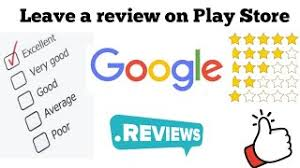



In [ ]:
df2

In [ ]:
df2.describe()

 #### **5.1 Total number of sentiments in negative, positive ,neutral**

In [ ]:
df2.groupby('Sentiment').count()

In [ ]:
# Total number of Apps
df2.groupby('App').count()

 #### **5.3 TOTAL NUMBER OF EMOTION IN EACH CATEGORY WITH GRAPH**

In [ ]:
# Positive sentiment
positive_data  = df2[df2['Sentiment']=='Positive']
positive_data

In [ ]:
# Sorting the apps on the basis of sentiment
top_most_positive_apps = positive_data.groupby('App').count()[['Sentiment']]
top_positive = top_most_positive_apps.sort_values(by='Sentiment',ascending=False).head(10)
top_positive

In [ ]:
top_positive.plot(kind='bar',color='b',width=0.5)

### Here I choose Bar plot for my convenience to compare the sentiment of each App.

###From the graph i found that "colorNote Notepad Notes" Application has been given most number of positive reviewe.

In [ ]:
#negative sentiments
negative_data = df2[df2['Sentiment'] == 'Negative']
negative_data

In [ ]:
#printing the data in ascending orders from maximum
top_most_negative_apps = negative_data.groupby('App').count()[['Sentiment']]
top_most_negative_apps.sort_values(by='Sentiment',ascending=False).head(10)

In [ ]:
plot2 = negative_data.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(12,4), color='Black').invert_yaxis()
plt.xlabel('total number of negative reviews')
plt.title('Apps with highest number of negative reviews')

###Here also i choose Bar plot for caategorical data.

###From the plot we can see that "Angry Bird Classic","Be A Legend:Soccer" and Facebook are the most negative reviewed applications.

In [ ]:
#c Neutral sentiment
neutral_data = df2[df2['Sentiment'] == 'Neutral']
neutral_data

In [ ]:
#printing the data in ascending orders from maximum
top_most_neutral_apps = neutral_data.groupby('App').count()[['Sentiment']]
top_most_neutral_apps.sort_values(by='Sentiment',ascending=False).head(10)

In [ ]:
neutral_data.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.pie()
#plt.xlabel('total number of neutral reviews')
plt.title('Apps with highest number of neutral reviews')

### As pie chat is used to show the values which wil not change over time , i choose pie chat for neutral santiment Apps.

####**5.4 SENTIMENT ANALYSIS TO CHECK WHICH AAP HAS MAXIMUM & MINIMUM POSITIVE,NEUTRAL,NEGATIVE**####

In [ ]:
major_negative_polarity= df2[(df2.Sentiment_Polarity>=-1) & (df2.Sentiment_Polarity<-0.5)]
minor_negative_polarity= df2[(df2.Sentiment_Polarity>=-0.5) & (df2.Sentiment_Polarity<0)]
minor_positve_polarity= df2[(df2.Sentiment_Polarity>=0) & (df2.Sentiment_Polarity<0.5)]
major_positive_polarity= df2[(df2.Sentiment_Polarity>=0.5) & (df2.Sentiment_Polarity<1)]

print('major_negative_polarity = ',major_negative_polarity['Sentiment_Polarity'].count() )
print('minor_negative_polarity = ',minor_negative_polarity['Sentiment_Polarity'].count() )
print('minor_positve_polarity = ',minor_positve_polarity['Sentiment_Polarity'].count() )
print('major_positive_polarity = ',major_positive_polarity['Sentiment_Polarity'].count() )

In [ ]:
sentiment_analysis_data2= {'major_negative_polarity':786, 'minor_negative_polarity':5535, 'minor_positve_polarity':17147, 'major_positive_polarity':5410}
sentiment_analysis_data2

In [ ]:
#graph of SENTIMENT_POLARITY

plt.rcParams['figure.figsize']=(15,5)
sentiment_analysis_data2
categorised_sentiment = list(sentiment_analysis_data2.keys())
number_of_sentiment = list(sentiment_analysis_data2.values())


In [ ]:
sentiment_analysis_data2 = range(len(categorised_sentiment))
number_of_sentiment = [786,5535,17147,5410]
categorised_sentiment = ['major_negative_polarity', 'minor_negative_polarity', 'minor_positve_polarity','major_positive_polarity']

# Set the desired height
bar_height = 0.5

# Create the horizontal bar plot
plt.barh(sentiment_analysis_data2, number_of_sentiment, height=bar_height, tick_label=categorised_sentiment, color='red')

# Add labels and title
plt.title('Category-wise Number of Sentiment of Applications', size=15)
plt.xlabel('Number of Sentiment', size=13)
plt.ylabel('Categorised Sentiment', size=13)

# Display the plot
plt.show()


### I choose bar plot for categorical data, and also it is easy to compare the datas.

###Fromm the graph it is clear that most of the user have minor positive polarity.

In [ ]:
major_Sentiment_Subjectivity= df2[(df2.Sentiment_Subjectivity>0.5) & (df2.Sentiment_Subjectivity<1)]
minor_Sentiment_Subjectivity= df2[(df2.Sentiment_Subjectivity>0) & (df2.Sentiment_Subjectivity<0.25)]
average_Sentiment_Subjectivity= df2[(df2.Sentiment_Subjectivity>.26) & (df2.Sentiment_Subjectivity<0.5)]

print('major_Sentiment_Subjectivity = ',major_Sentiment_Subjectivity['Sentiment_Subjectivity'].count() )
print('minor_Sentiment_Subjectivity = ',minor_Sentiment_Subjectivity['Sentiment_Subjectivity'].count() )
print('average_Sentiment_Subjectivity = ',average_Sentiment_Subjectivity['Sentiment_Subjectivity'].count() )

In [ ]:
sentiment_analysis_data3={'major_Sentiment_Subjectivity': [13811],
                           'minor_Sentiment_Subjectivity':[1420], 'average_Sentiment_Subjectivity':[7646]}
sentiment_analysis_data3

In [ ]:
checking = pd.DataFrame(sentiment_analysis_data3).T

In [ ]:
sns.barplot(x=checking.index,y=checking[0])

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

###To get more trafic on our App we should focus on Apps under Family category, and also we should focus on its features to get good Reviews and higher Ratinng.App should be free because as we see from this analysis free apps have higher Installs.

###we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps,so we can focus on these categories to gt more traffic on our App.

# **Conclusion**

### From the given project we have concluded:-
###1- From the study of Category wise application count, it is concluded that family category has highest numbers of applications.
###2- Game category applications have most  number of installs.
###3-4.3 star rating is the most popular rating on a scale of 1-5.
###4-Most of the Apps are Free in Play store.
###5-Higher Rating apps have higher amount of reviews , Installs , and Size.
###6-Price of an Application doesn't affect the Rating of the Application.
###7-Majority of the free apps are small in size and having high Rting.
###8-Installs,Reviews and Rating are positively correlated with each other.
###9-Most of the Applications fall under Android version 4.1 category .
###10-"I'm Rich - Trump Edition"	is the most expensive App.
###11-"Subway Surfers" is the most installed App.
###12-"Facebook" has maximum number of Reviews.
###13-Most of the App have gotten positive sentiment.
###14-Most number of positive Reviews is given to "ColorNote Notepad Notes" App.
###15-Most number of negative Reviews is given to Facebook,Be A Legend: Soccer,Angry Birds Classic.
###16-"BestCam Selfie-selfie, beauty camera, photo editor	" App is the present at the top of Neutral Apps.
###17-Most of the Apps fall under "minor positive polarity" sentiment category.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***